In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

initial_k = int(input("Initial K: "))
t_groups = int(input("T groups: "))
R1 = int(input("R1: "))
R2 = int(input("R2: "))
print(f"Testing with initial k= {initial_k}")
neighbor = KNeighborsClassifier(n_neighbors=initial_k) #Initial K value here
neighbor.fit(X_train,y_train)
scores = cross_val_score(neighbor, X_train, y_train, cv=t_groups) # Split T group here
for i, score in enumerate(scores):
    print(f'\t {i}) {score*100:.2f}%')
test_score = neighbor.score(X_test,y_test)
print(f'Test Score: {test_score*100:.2f}%')

print(f"Optimized k in range [{R1}:{R2}]")
gc = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': range(R1,R2+1)}, cv=t_groups)
gc.fit(X_train, y_train)
score = gc.score(X_test, y_test)
print(f'\t GridSearch score: {score*100:.2f}, with optimized k={gc.best_estimator_.n_neighbors} and weight {gc.best_estimator_.weights}')


<class 'numpy.ndarray'>
Initial K: 10
T groups: 5
R1: 1
R2: 8
Testing with initial k= 10
	 0) 91.67%
	 1) 91.67%
	 2) 91.67%
	 3) 95.83%
	 4) 100.00%
Test Score: 93.33%
Optimized k in range [1:8]
	 GridSearch score: 90.00, with optimized k=2 and weight uniform


Decision Boundary using initial k, k = 10
<class 'numpy.ndarray'>


TypeError: title() missing 1 required positional argument: 'label'

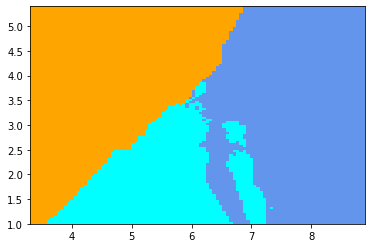

In [12]:
print(f"Decision Boundary using initial k, k = {initial_k}")

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
X_new = X[:, :2]
knn = KNeighborsClassifier(n_neighbors=initial_k)
knn.fit(X_new,y)
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
print(type(load_iris().target_names))
#sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=load_iris().target_names[y],palette=cmap_bold)
plt.title()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [1]:
error_rate = []
for i in range(R1,R2+1):
    error_rate.append(1 - gc.cv_results_['mean_test_score'][i-1])
    
plt.plot(range(R1,R2+1),error_rate,marker='o')
plt.axvline(x=gc.best_estimator_.n_neighbors, ls='--')
plt.xlabel("Values of K")
plt.ylabel("Error Rates")
plt.title("Error Rates by K values of GridSearchCV")
plt.show()

NameError: name 'R1' is not defined